#Theory

1.  Can we use Bagging for regression problems?

Ans: Yes, Bagging can be used for regression using models like bagging regressor.

2. What is the difference between multiple model training and single model training.

Ans: Multiple model training combines several models to improve accuracy, single model uses one algorithm.

3. Explain the concept of feature randomness in Random Forest?

Ans: Random forest randomly selects subsets of features at each split to reduce correlation.

4.  What is OOB (Out-of-Bag) Score?

Ans: It is a validation score using samples not included in teh boostrap training set.

5. How can you measure the importance of features in a Random Forest model?

Ans: By checking how much each feature reduces impurity or affects model accuracy.

6. Explain the working principle of a Bagging Classifier?

Ans: It trains multiple models on random subsets and takes the most frequency data as predicted.

7. How do you evaluate a Bagging Classifier’s performance?

Ans: Using accuracy,precision,recall,f1-score or OOB score.

8.  How does a Bagging Regressor work?

Ans: It averages predictions from several regressors trained on bootstrapped data.

9. What is the main advantage of ensemble techniques?

Ans: They improve accuracy and reduce overfitting.

10.  What is the main challenge of ensemble methods?

Ans: They can be computationally expensive and harder to interpret.

11. Explain the key idea behind ensemble technique?

Ans: Combine multiple models to make better predictions than any single model.

12.  What is a Random Forest Classifier?

Ans: An ensemble of decision trees tarined using bagging and feature randomness.

13. What are the main types of ensemble techniques?

Ans: Bagging,Bossting and Stacking.

14. What is ensemble learning in machine learning?

Ans: It combines predictions from multiple models to improve performance.

15. When should we avoid using ensemble methods?

Ans:  When the model needs to be simple,fast, or highly interpretable.

16.  How does Bagging help in reducing overfitting?

Ans: By averaging multiple models trained on different samples, reducing variance.

17.  Why is Random Forest better than a single Decision Tree?

Ans: It is more accurate and less prone to overfitting.

18. What is the role of bootstrap sampling in Bagging?

Ans: It creates different training sets to train multiple models.

19.  What are some real-world applications of ensemble techniques?

Ans: fraud detection,stock prediction,medical diagnosis, recommendation systems.

20.  What is the difference between Bagging and Boosting?

Ans: Bagging trains models independently in parallel, bossting trains sequentially to fix errors.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Practical

#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy?

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

x,y=make_classification(n_samples=1000,n_features=4,n_informative=2,random_state=42,n_classes=2)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

bagging=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,oob_score=True)
bagging.fit(x_train,y_train)

y_pred=bagging.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.92


In [3]:
#22.2 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)?

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

x,y=make_regression(n_samples=1000,n_features=4,n_informative=2,random_state=42)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

bagging=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,oob_score=True)
bagging.fit(x_train,y_train)

y_pred=bagging.predict(x_test)

print("Mean squared error:",mean_squared_error(y_test,y_pred))

Mean squared error: 20.12801645101624


In [4]:
#23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores?

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

randomforest=RandomForestClassifier(n_estimators=200)
randomforest.fit(x_train,y_train)
y_pred=randomforest.predict(x_test)
print("Feature importance:")
for i in range(len(cancer.feature_names)):
  print(cancer.feature_names[i],":",randomforest.feature_importances_[i])

Feature importance:
mean radius : 0.029560446277179863
mean texture : 0.017126070016720178
mean perimeter : 0.03961701165578896
mean area : 0.0408573242635184
mean smoothness : 0.00634046613002122
mean compactness : 0.005473993177382251
mean concavity : 0.04796496790451114
mean concave points : 0.15980817136799794
mean symmetry : 0.0027867241669085508
mean fractal dimension : 0.004378879322727263
radius error : 0.01979388370266422
texture error : 0.004457692598763947
perimeter error : 0.019717954006690304
area error : 0.026797307455234162
smoothness error : 0.0063502225655224466
compactness error : 0.0038772091432506496
concavity error : 0.00762704473879692
concave points error : 0.00289061882295258
symmetry error : 0.004600695438155856
fractal dimension error : 0.005328005014311942
worst radius : 0.08366930457251222
worst texture : 0.021107837445240158
worst perimeter : 0.10869822518937987
worst area : 0.09082636206623296
worst smoothness : 0.009912683053079296
worst compactness : 0.0

In [5]:
#24.  Train a Random Forest Regressor and compare its performance with a single Decision Tree?

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor


x,y=make_regression(n_samples=1000,n_features=4,n_informative=2,random_state=42)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

randomforest=RandomForestRegressor(n_estimators=200)
randomforest.fit(x_train,y_train)
y_pred_random=randomforest.predict(x_test)


decisiontree=DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)
y_pred_decision=decisiontree.predict(x_test)

print("Random forest r2 :",r2_score(y_test,y_pred_random))
print("Decision tree r2 :",r2_score(y_test,y_pred_decision))

Random forest r2 : 0.9909782269081663
Decision tree r2 : 0.9874443824083537


In [6]:
#25.  Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

randomforest=RandomForestClassifier(n_estimators=200,oob_score=True)
randomforest.fit(x_train,y_train)
y_pred=randomforest.predict(x_test)
print("OOB score is :",randomforest.oob_score_)


OOB score is : 0.9547738693467337


In [7]:
#26.  Train a Bagging Classifier using SVM as a base estimator and print accuracy?

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

x,y=make_classification(n_samples=1000,n_features=4,n_informative=2,random_state=42,n_classes=2)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

bagging=BaggingClassifier(estimator=SVC(),n_estimators=100,oob_score=True)
bagging.fit(x_train,y_train)

y_pred=bagging.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.8733333333333333


10 trees → Accuracy: 0.9561
50 trees → Accuracy: 0.9649
100 trees → Accuracy: 0.9649
200 trees → Accuracy: 0.9649
500 trees → Accuracy: 0.9649


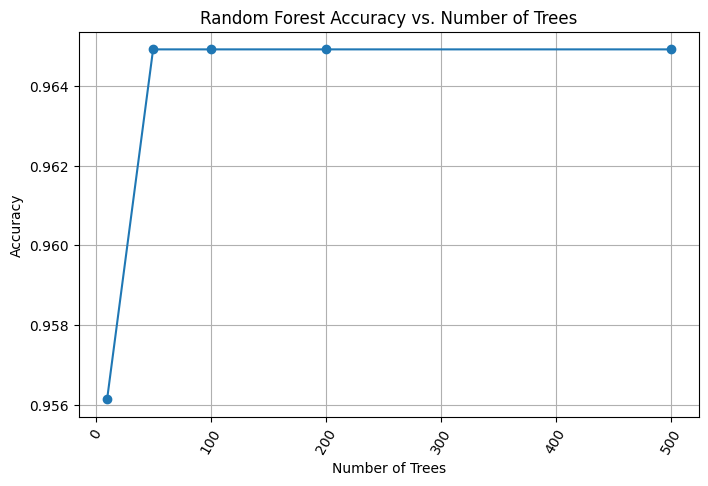

In [8]:
#27.  Train a Random Forest Classifier with different numbers of trees and compare accuracy?

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_counts = [10, 50, 100, 200, 500]
accuracies = []

for n_trees in tree_counts:
    clf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"{n_trees} trees → Accuracy: {acc:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(tree_counts, accuracies, marker='o')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()


In [9]:
#28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score?
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression

x,y=make_classification(n_samples=1000,n_features=4,n_informative=2,random_state=42,n_classes=2)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

bagging=BaggingClassifier(estimator=LogisticRegression(),n_estimators=100,oob_score=True)
bagging.fit(x_train,y_train)

y_pred=bagging.predict(x_test)

print("AUC score:",roc_auc_score(y_test,y_pred))


AUC score: 0.8660797652394292


In [10]:
#29.  Train a Random Forest Regressor and analyze feature importance scores?

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(x_train, y_train)

importances = regressor.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False, ignore_index=True)

print(feature_importance_df)


                    Feature  Importance
0           worst perimeter    0.376177
1      worst concave points    0.267738
2                worst area    0.108301
3              worst radius    0.063416
4       mean concave points    0.046476
5             worst texture    0.027214
6           worst concavity    0.016172
7              mean texture    0.012386
8                area error    0.010981
9            mean concavity    0.010504
10         worst smoothness    0.008467
11           worst symmetry    0.004556
12        compactness error    0.004050
13          concavity error    0.003649
14        worst compactness    0.003621
15  worst fractal dimension    0.003377
16            texture error    0.003208
17     concave points error    0.003198
18  fractal dimension error    0.003156
19             radius error    0.002829
20           symmetry error    0.002711
21              mean radius    0.002417
22            mean symmetry    0.002407
23          mean smoothness    0.002330


In [11]:
#30.Train an ensemble model using both Bagging and Random Forest and compare accuracy?

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

x,y=make_classification(n_samples=1000,n_features=4,n_informative=2,random_state=42,n_classes=2)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

bagging=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=300,oob_score=True)
bagging.fit(x_train,y_train)

y_pred_bagging=bagging.predict(x_test)

print("Accuracy score for bagging classifier :",accuracy_score(y_test,y_pred_bagging))

rf=RandomForestClassifier(n_estimators=300)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print("Accuracy score for random forest :",accuracy_score(y_test,y_pred_rf))

Accuracy score for bagging classifier : 0.9266666666666666
Accuracy score for random forest : 0.9266666666666666


In [12]:
#31.  Train a Random Forest Classifier and tune hyperparameters using GridSearchCV


x,y=make_classification(n_samples=1000,n_features=4,n_informative=2,random_state=42,n_classes=2)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.model_selection import GridSearchCV
params={"n_estimators":[10,20,30,50,200,100,500],
        "criterion":["gini","entropy"],
        "max_depth":[5,10,15,10]}
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=10,verbose=1)

grid.fit(x_train,y_train)
best_est=grid.best_estimator_

y_pred=best_est.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Best estimator:",best_est)


Fitting 10 folds for each of 56 candidates, totalling 560 fits
Accuracy score: 0.9033333333333333
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=10)


10 estimators → MSE: 3256.96
50 estimators → MSE: 3056.49
100 estimators → MSE: 2970.86
200 estimators → MSE: 2995.62


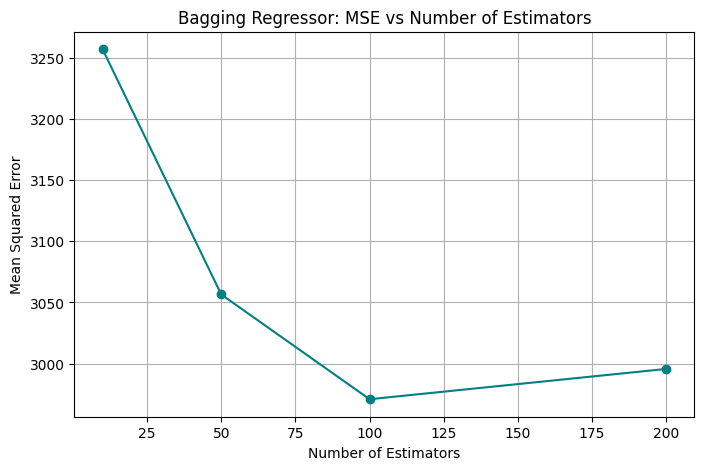

In [13]:
#32.  Train a Bagging Regressor with different numbers of base estimators and compare performance

# Import required libraries
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estimator counts to test
estimator_counts = [10, 50, 100, 200]
mse_scores = []

# Train models and record performance
for n_estimators in estimator_counts:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n_estimators,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"{n_estimators} estimators → MSE: {mse:.2f}")

# Plot performance
plt.figure(figsize=(8, 5))
plt.plot(estimator_counts, mse_scores, marker='o', color='teal')
plt.title('Bagging Regressor: MSE vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


In [28]:
#33.  Train a Random Forest Classifier and analyze misclassified samples

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

x,y=make_classification(n_samples=500,n_features=4,n_informative=2,random_state=42,n_classes=2,weights=[0.5,0.5])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=300,class_weight="balanced")
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

confusion_matrix(y_test,y_pred_rf)
print(classification_report(y_test,y_pred_rf))
print(roc_auc_score(y_test,y_pred_rf))
print("Accuracy score for random forest :",accuracy_score(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.97      0.97      0.97        79

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

0.9732572651096452
Accuracy score for random forest : 0.9733333333333334


In [21]:
#34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

x,y=make_classification(n_samples=1000,n_features=4,n_informative=2,random_state=42,n_classes=2)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

bagging=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,oob_score=True)
bagging.fit(x_train,y_train)

y_pred=bagging.predict(x_test)

print("Accuracy score for bagging :",accuracy_score(y_test,y_pred))


dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)


print("Accuracy score for decision tree :",accuracy_score(y_test,y_pred_dtc))


Accuracy score for bagging : 0.9233333333333333
Accuracy score for decision tree : 0.87


Accuracy score for random forest : 0.9666666666666667


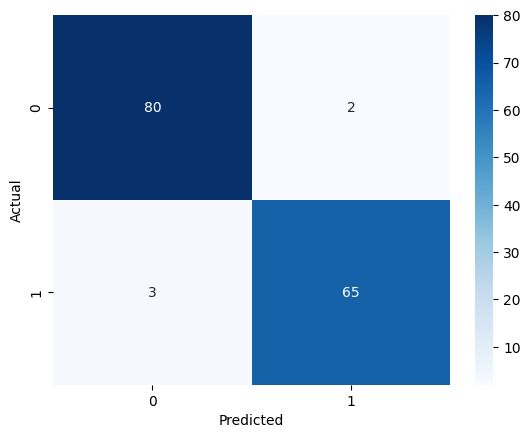

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        82
           1       0.97      0.96      0.96        68

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

0.9657460545193688


In [23]:
#35. Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

x,y=make_classification(n_samples=500,n_features=4,n_informative=2,random_state=42,n_classes=2,weights=[0.6,0.4])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=300)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print("Accuracy score for random forest :",accuracy_score(y_test,y_pred_rf))

confusion=confusion_matrix(y_test,y_pred_rf)

sns.heatmap(confusion, annot=True,cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test,y_pred_rf))
print(roc_auc_score(y_test,y_pred_rf))

In [31]:
#36.  Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


base_models=[("dt",DecisionTreeClassifier()),
             ("svm",SVC())]

final_model=LogisticRegression()
stack_lr=StackingClassifier(estimators=base_models,final_estimator=final_model,cv=10)
stack_lr.fit(x_train,y_train)
y_pred_lr=stack_lr.predict(x_test)
print("Accuracy for stacking using logistic regression as final model is",accuracy_score(y_test,y_pred_lr))


base_models=[("dt",DecisionTreeClassifier()),
             ("lr",LogisticRegression())]

final_model=SVC()
stack_svc=StackingClassifier(estimators=base_models,final_estimator=final_model,cv=10)
stack_svc.fit(x_train,y_train)
y_pred_svc=stack_svc.predict(x_test)
print("Accuracy for stacking using SVM as final model is",accuracy_score(y_test,y_pred_svc))


base_models=[("svm",SVC()),
             ("lr",LogisticRegression())]

final_model=DecisionTreeClassifier()
stack_dtc=StackingClassifier(estimators=base_models,final_estimator=final_model,cv=10)
stack_dtc.fit(x_train,y_train)
y_pred_dtc=stack_dtc.predict(x_test)
print("Accuracy for stacking using DecisionTreeClassifier as final model is",accuracy_score(y_test,y_pred_dtc))

Accuracy for stacking using logistic regression as final model is 0.9473684210526315
Accuracy for stacking using SVM as final model is 0.9649122807017544
Accuracy for stacking using DecisionTreeClassifier as final model is 0.9736842105263158


In [55]:
#37.  Train a Random Forest Classifier and print the top 5 most important features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report

cancer=load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df["target"]=pd.DataFrame(cancer.target)

x=df.iloc[:,:-1]
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=300)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

#importance features

print("Important features")
for i in range(6):
  print(x_train.columns[i],":",rf.feature_importances_[i])


Important features
mean radius : 0.035464127832724054
mean texture : 0.01662083012287841
mean perimeter : 0.05404021069073252
mean area : 0.04728943739881899
mean smoothness : 0.005713527939185258
mean compactness : 0.010276315869622995


In [63]:
#38.  Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier

x,y=make_classification(n_samples=1000,n_features=4,n_informative=2,random_state=42,n_classes=2)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

bagging=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,oob_score=True)
bagging.fit(x_train,y_train)

y_pred=bagging.predict(x_test)

print("Precision score for bagging :",precision_score(y_test,y_pred))
print("Recall score for bagging :",recall_score(y_test,y_pred))
print("F1 score for bagging :",f1_score(y_test,y_pred))

Precision score for bagging : 0.9496402877697842
Recall score for bagging : 0.8979591836734694
F1 score for bagging : 0.9230769230769231


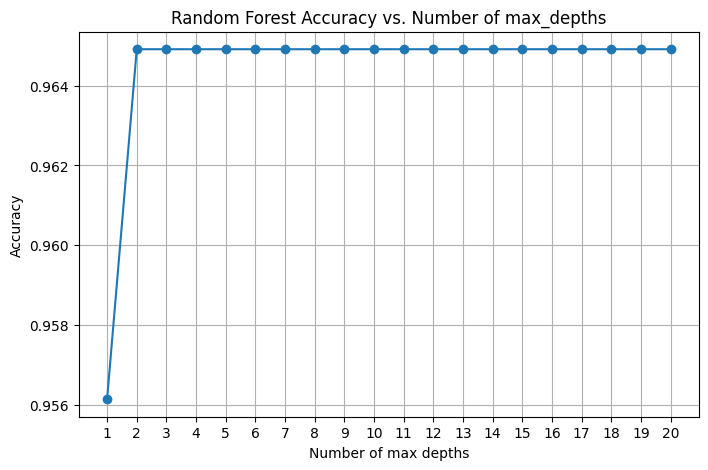

In [70]:
#39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy


from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = list(range(1, 21))
accuracies = []

for depth in depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o')
plt.title('Random Forest Accuracy vs. Number of max_depths')
plt.xlabel('Number of max depths')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [67]:
#40.Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
# performance


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

x,y=make_regression(n_samples=1000,n_features=4,n_informative=2,random_state=42)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

bagging=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,oob_score=True)
bagging.fit(x_train,y_train)

y_pred=bagging.predict(x_test)

print("r2 score for decision tree:",r2_score(y_test,y_pred))


bagging_knn=BaggingRegressor(estimator=KNeighborsRegressor(),n_estimators=100,oob_score=True)
bagging_knn.fit(x_train,y_train)

y_pred=bagging_knn.predict(x_test)

print("r2 score for KNN:",r2_score(y_test,y_pred))

r2 score for decision tree: 0.991227747946273
r2 score for KNN: 0.9534909740162871


In [75]:
#41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

cancer=load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df["target"]=pd.DataFrame(cancer.target)

x=df.iloc[:,:-1]
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=300,class_weight="balanced")
rf.fit(x_train,y_train)
y_pred_proba=rf.predict_proba(x_test)[:,1]


print("ROC AUC:",roc_auc_score(y_test,y_pred_proba))

ROC AUC: 0.9977219282774838


In [76]:
#42. Train a Bagging Classifier and evaluate its performance using cross-validation

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
base_model = DecisionTreeClassifier()

bagging_clf = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,
    random_state=42
)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(bagging_clf, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9667
Standard Deviation: 0.0211


y_test shape: (114,), y_probs shape: (114,)


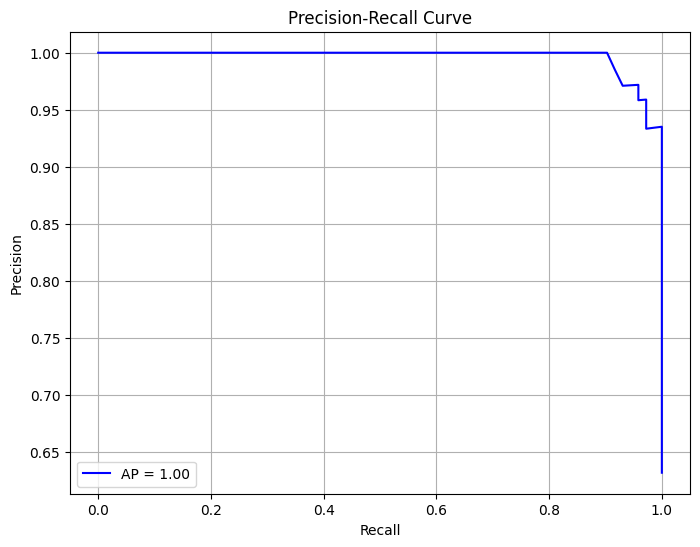

In [82]:
#43. Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_probs = rf.predict_proba(X_test)[:, 1]  # Make sure this matches y_test

print(f"y_test shape: {y_test.shape}, y_probs shape: {y_probs.shape}")

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()



In [87]:
#44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


base_models=[("dt",DecisionTreeClassifier()),
             ("svm",SVC()),
             ("knn",KNeighborsClassifier())]

final_model=LogisticRegression()
stack_lr=StackingClassifier(estimators=base_models,final_estimator=final_model,cv=10)
stack_lr.fit(x_train,y_train)
y_pred_lr=stack_lr.predict(x_test)
print("Accuracy for stacking using logistic regression as final model is",accuracy_score(y_test,y_pred_lr))


final_model=RandomForestClassifier()
stack_rf=StackingClassifier(estimators=base_models,final_estimator=final_model,cv=10)
stack_rf.fit(x_train,y_train)
y_pred_rf=stack_rf.predict(x_test)
print("Accuracy for stacking using RandomForestClassifier as final model is",accuracy_score(y_test,y_pred_rf))


Accuracy for stacking using logistic regression as final model is 0.956140350877193
Accuracy for stacking using RandomForestClassifier as final model is 0.9649122807017544


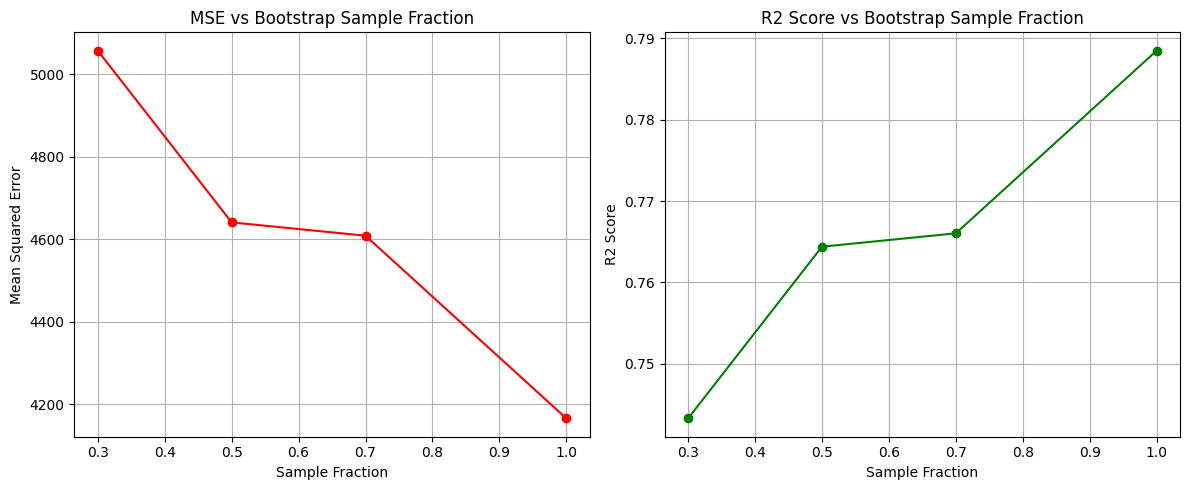

   Sample Fraction          MSE  R2 Score
0              0.3  5057.287674  0.743259
1              0.5  4641.212286  0.764382
2              0.7  4608.894738  0.766022
3              1.0  4166.225880  0.788495


In [88]:
#45.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
sample_sizes = [0.3, 0.5, 0.7, 1.0]  # fractions of training data
results = []

for frac in sample_sizes:
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        max_samples=frac,
        bootstrap=True,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({'Sample Fraction': frac, 'MSE': mse, 'R2 Score': r2})
# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot MSE and R2
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_results['Sample Fraction'], df_results['MSE'], marker='o', color='red')
plt.title('MSE vs Bootstrap Sample Fraction')
plt.xlabel('Sample Fraction')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df_results['Sample Fraction'], df_results['R2 Score'], marker='o', color='green')
plt.title('R2 Score vs Bootstrap Sample Fraction')
plt.xlabel('Sample Fraction')
plt.ylabel('R2 Score')
plt.grid(True)

plt.tight_layout()
plt.show()

print(df_results)
